# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [8]:
cities[0]

'komsomolskiy'

In [29]:
#openweatherMap API key
#api_key = api_keys.weather_api_key

# Starting URL for weather Map API call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial{}" + api_key
#url = "http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={your api key}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#OpenweatherMap API KEY
api_key = api_keys.weather_api_key
print(api_key)

#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
#Weather Map URL for API call
base_url = "http://api.openweathermap.org/data/2.5/weather"
url = f"{base_url}?appid={api_key}"
#url = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=Imperial" + api_key    

d0d69113f60fdc94b5705d8928ae8d18


In [24]:
print (f'api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={api_key}')

api.openweathermap.org/data/2.5/weather?q=komsomolskiy&appid=d0d69113f60fdc94b5705d8928ae8d18


In [25]:
#response = requests.get(url)
#data = response.json()
#print(data)
print (url)

http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18


In [39]:
response = requests.get(f"{url}&q={cities[0]}").json()
#print(response["wind"]["speed"])
city_record = response["name"]
print (city_record)


Yangi Marg`ilon


In [40]:
#list for holding API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#call counter
call_count = 1

#file print statement 
print (f"Beginning Data Retrieval")
print (f"----------")

for city in cities: 
    #Try statement to append where value is found. 
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {city_record}")
        print(f"{url}?q={city}")
        
        # increase count by 1
        call_count- call_count + 1
        
        #account for rate limit
        time.sleep(1.01)
        
#IF null values to skip to next call
    except:
        print("City not Found. Skipping...")
    continue 

        

Beginning Data Retrieval
----------
Processing Record Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=komsomolskiy
City not Found. Skipping...
Processing Record Mahébourg
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mahebourg
Processing Record Galesong
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=galesong
Processing Record Arrondissement de Vierzon
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=vierzon
Processing Record Dikson
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=dikson
Processing Record Lamar
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=lamar
Processing Record Lebu
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=lebu
Processing Record Tiksi
http://api.openweathermap.org/dat

Processing Record Moose Factory
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=moose factory
Processing Record Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=jamestown
Processing Record Rio Grande
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=rio grande
Processing Record Bariloche
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=san carlos de bariloche
Processing Record Portland
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=portland
Processing Record Vao
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=vao
Processing Record Zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=zheleznodorozhnyy
Processing Record Chui
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94

Processing Record Kieta
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=kieta
Processing Record Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mehamn
Processing Record São João da Barra
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=sao joao da barra
Processing Record Kaithal
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=kaithal
City not Found. Skipping...
Processing Record Tautira
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=tautira
Processing Record Chaozhou
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=chaozhou
Processing Record Mar del Plata
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mar del plata
Processing Record Chinchinim
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113

Processing Record Zheshart
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=zheshart
Processing Record Chabahar
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=chabahar
Processing Record Itarema
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=itarema
Processing Record Solwezi
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=solwezi
Processing Record Barra de São Francisco
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=barra de sao francisco
Processing Record Pisco
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=pisco
Processing Record Illapel
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=illapel
Processing Record Ürümqi
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=uru

Processing Record Walvis Bay
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=walvis bay
Processing Record Oddur
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=xuddur
City not Found. Skipping...
Processing Record Pilane
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=pilane
Processing Record Hong Kong
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=victoria
Processing Record Khandyga
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=khandyga
Processing Record Mawlaik
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mawlaik
Processing Record Mahabalipuram
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mamallapuram
Processing Record Kidal
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d89

Processing Record Nikolayevsk-on-Amur
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=nikolayevsk-na-amure
Processing Record Al Bardīyah
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=bardiyah
Processing Record Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=provideniya
City not Found. Skipping...
City not Found. Skipping...
Processing Record Alugan
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=alugan
Processing Record Beihai
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=beihai
Processing Record Luanda
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=luanda
Processing Record Wanaka
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=wanaka
Processing Record Union City
http://api.openweathermap.org/d

Processing Record Avera
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=avera
Processing Record Severnoye
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=severnoye
Processing Record Cho Dok
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=chau doc
Processing Record Dekar
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=dekar
Processing Record Mata
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=mata
Processing Record Dolores
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=dolores
Processing Record Bilma
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=bilma
Processing Record Salinópolis
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=salinopolis
Processing Record Burnie
http

Processing Record Rafaela
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=rafaela
Processing Record Kijini
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=kijini
Processing Record Zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=zyryanka
Processing Record Keti Bandar
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=keti bandar
Processing Record Smoky Lake
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=smoky lake
Processing Record Padang
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=padang
Processing Record St. George's
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=saint-georges
Processing Record Batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=battic

Processing Record Geraldton
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=geraldton
Processing Record Vila Velha
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=vila velha
Processing Record Penzance
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=penzance
Processing Record Nālchiti
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=nalchiti
Processing Record Kensington
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=kensington
Processing Record Gazimurskiy Zavod
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=gazimurskiy zavod
Processing Record The Pas
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928ae8d18?q=the pas
Processing Record Kunming
http://api.openweathermap.org/data/2.5/weather?appid=d0d69113f60fdc94b5705d8928a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_df = pd.DataFrame(weather_dict)

#display count of Weather Dictionary values
weather_df.count()

City          575
Lat           575
Lng           575
Humidity      575
Max Temp      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [50]:
weather_df.to_csv('weather_df.csv')

#Display the table 
weather_df.head()

,City,Lat,Lng,Humidity,Max Temp,Cloudiness,Wind Speed,Country,Date
0,Yangi Marg`ilon,40.43,71.72,32,302.15,64,3.10,UZ,1595481135
1,Mahébourg,-20.41,57.70,53,295.15,75,5.70,MU,1595481136
2,Galesong,-5.32,119.37,52,305.15,20,1.00,ID,1595481013
3,Arrondissement de Vierzon,47.21,2.06,100,284.15,18,1.55,FR,1595481139
4,Dikson,73.51,80.55,88,277.83,92,4.40,RU,1595481140


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

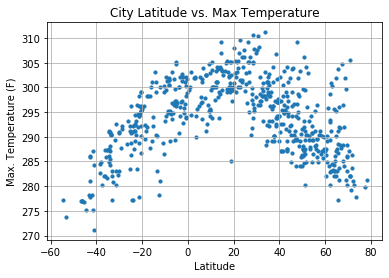

In [54]:
#Create Scatterplot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#plt.savefig("Output_data/Max_Temp_V_Latitude.png")

plt.show()

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

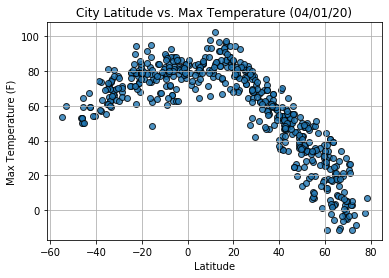

## Latitude vs. Humidity Plot

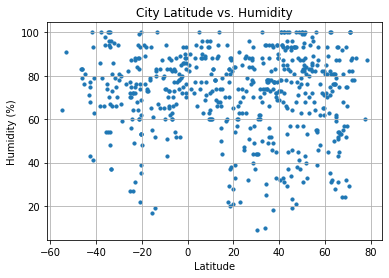

In [55]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show ()

## Latitude vs. Cloudiness Plot

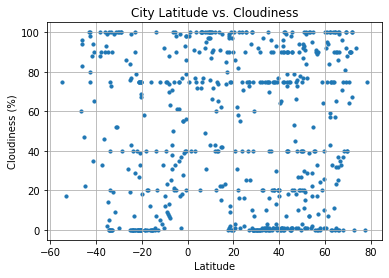

In [57]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

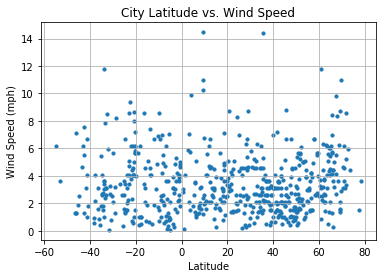

In [58]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

#Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


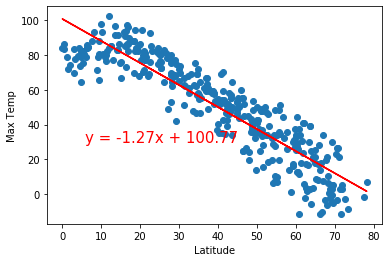

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


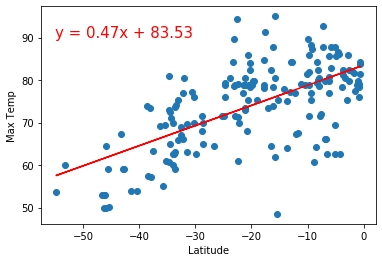

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


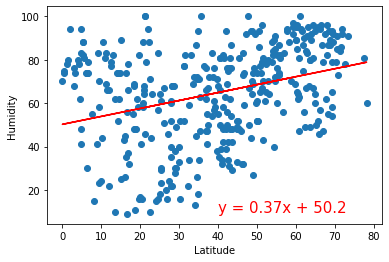

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


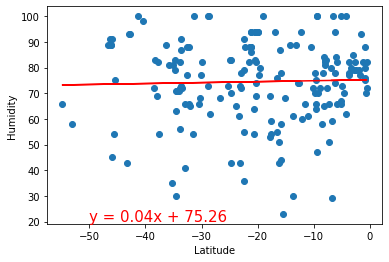

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


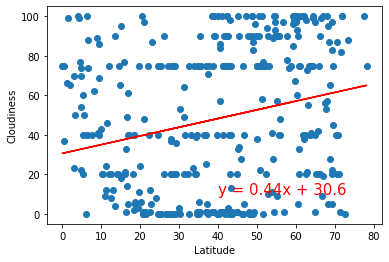

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


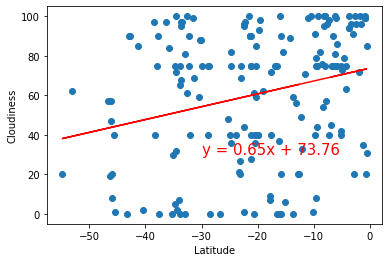

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


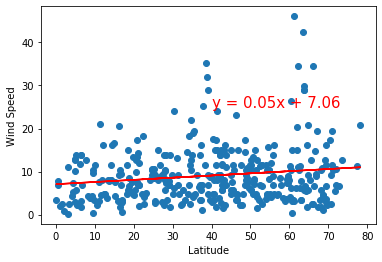

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


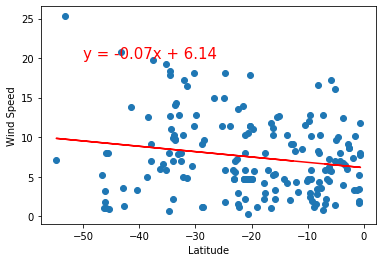